In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create data and implement PCA

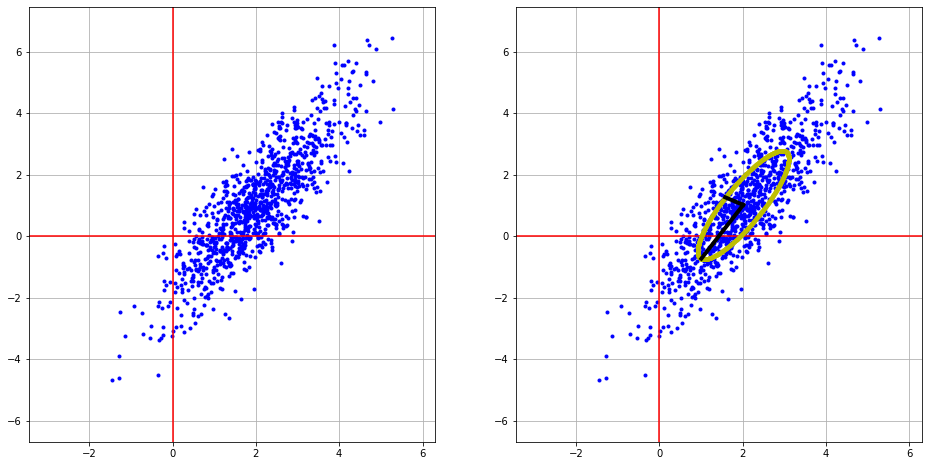

In [56]:
# Step1
mean = np.array([2, 1])
sig = np.array([2, 0.5])
cov = np.diag(sig)

theta = np.pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])

N = 1000
X = R @ cov @ np.random.randn(2, N) + np.diag(mean) @ np.ones((2, N))

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(121)
ax1.plot(X[0, :], X[1, :], '.', color='b')
ax1.grid()
ax1.axvline(x=0, c="red")
ax1.axhline(y=0, c="red")
plt.xlim([X[0, :].min()-2, X[0, :].max()+1])
plt.ylim([X[1, :].min()-2, X[1, :].max()+1])

# step2
X_avg = np.mean(X, axis=1)
B = X - np.tile(X_avg, (N, 1)).T
U, S, VT = np.linalg.svd(B/np.sqrt(N), full_matrices=False)

ax2 = fig.add_subplot(122)
ax2.plot(X[0, :], X[1, :], '.', color='b')
ax2.grid()
ax2.axvline(x=0, c="red")
ax2.axhline(y=0, c="red")
plt.xlim([X[0, :].min()-2, X[0, :].max()+1])
plt.ylim([X[1, :].min()-2, X[1, :].max()+1])

# Step 3
theta = np.linspace(0, 2 * np.pi, 1000)
X_elip = U @ np.diag(S) @ np.array([np.cos(theta), np.sin(theta)])

ax2.plot(X_elip[0, :]+X_avg[0], X_elip[1, :]+X_avg[1], '.', color='y')
ax2.plot(np.array([X_avg[0], X_avg[0]+U[0, 0]*S[0]]), np.array([X_avg[1], X_avg[1]+U[1, 0]*S[0]]), '-', color='k', linewidth=4)
ax2.plot(np.array([X_avg[0], X_avg[0]+U[0, 1]*S[1]]), np.array([X_avg[1], X_avg[1]+U[1, 1]*S[1]]), '-', color='k', linewidth=4)

plt.show()